<a href="https://colab.research.google.com/github/yc-chen10/113-1-finance/blob/main/week6%E4%BD%9C%E6%A5%AD_%E6%99%82%E9%96%93%E5%BA%8F%E5%88%97%E3%80%81%E9%87%8F%E5%8C%96%E4%BA%A4%E6%98%93%E7%AD%96%E7%95%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 發送 HTTP 請求以獲取網路上的資料
import requests

# 用來處理和分析結構化數據
import pandas as pd

# 用來處理時間
import datetime as dt

####抓股票資料（一年）

In [2]:
# "一詮"股票代號
stock_id = '2486'

# 獲取今天的日期（型別：str）
date = dt.date.today().strftime("%Y%m%d")
# date = yyyymmdd

print('今日日期：', date)

# 取得證交所網站資料，帶入網址參數 date：時間，stock_id：股票代號
# https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20240923&stockNo=2486
stock_data = requests.get(f'https://www.twse.com.tw/rwd/zh/ \
            afterTrading/STOCK_DAY?date={date}&stockNo={stock_id}')

# 將結果轉換 JSON 格式
json_data = stock_data.json()

# 將 JSON 格式轉換爲 Dataframe 格式，
# 方便在 Python 中處理結構化資料
df = pd.DataFrame(data=json_data['data'],
                  columns=json_data['fields'])

df

今日日期： 20241022


,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,113/10/01,"11,318,016","1,145,769,093",101.00,103.00,100.00,101.00,+1.00,"6,366"
1,113/10/04,"17,963,455","1,859,383,807",101.00,105.00,100.00,104.00,+3.00,"10,741"
2,113/10/07,"47,792,256","5,263,929,436",106.50,113.00,105.00,111.00,+7.00,"31,550"
3,113/10/08,"26,387,911","2,945,195,121",109.50,113.00,108.50,112.50,+1.50,"18,456"
4,113/10/09,"46,140,678","5,333,619,361",115.00,120.50,111.50,114.00,+1.50,"29,042"
5,113/10/11,"45,049,314","5,348,547,196",115.00,123.00,112.00,119.00,+5.00,"27,176"
6,113/10/14,"29,255,940","3,496,442,412",119.50,123.00,116.50,121.00,+2.00,"19,090"
7,113/10/15,"37,794,073","4,657,800,764",122.50,126.50,120.50,121.50,+0.50,"27,725"
8,113/10/16,"44,783,063","5,620,432,514",120.00,129.50,119.00,124.00,+2.50,"26,267"
9,113/10/17,"19,432,309","2,410,457,345",125.50,126.50,122.00,123.00,-1.00,"11,592"


In [3]:
def get_stock_data(stock_no, year, month):
    # 將日期格式化為 'yyyymmdd'，並指定為該月份的第一天
    date = f"{year}{str(month).zfill(2)}01"
    url = f"https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date={date}&stockNo={stock_no}"

    # 發送HTTP請求並獲取響應
    response = requests.get(url)
    if response.status_code == 200:
        # 將結果轉換為JSON
        data = response.json()
        if data['stat'] == 'OK':
            # 返回數據中的每日交易資料
            return pd.DataFrame(data['data'], columns=data['fields'])
        else:
            print(f"No data for {year}-{month}")
            return None
    else:
        print(f"Failed to fetch data for {year}-{month}")
        return None


In [4]:
def get_multiple_months(stock_no, start_year, start_month, end_year, end_month):
    all_data = []

    # 循環通過年份和月份來調用API
    current_year = start_year
    current_month = start_month

    while (current_year < end_year) or (current_year == end_year and current_month <= end_month):
        # 獲取單月的股票資料
        monthly_data = get_stock_data(stock_no, current_year, current_month)
        if monthly_data is not None:
            all_data.append(monthly_data)

        # 更新到下一個月份
        if current_month == 12:
            current_month = 1
            current_year += 1
        else:
            current_month += 1

    # 合併所有月份的數據
    if all_data:
        return pd.concat(all_data, ignore_index=True)
    else:
        return None


In [5]:
stock_no = '2486'
start_year = 2023
start_month = 9
end_year = 2024
end_month = 9

stock_data = get_multiple_months(stock_no, start_year, start_month, end_year, end_month)

# 打印股票資料
if stock_data is not None:
    print(stock_data)


            日期        成交股數           成交金額     開盤價     最高價    最低價     收盤價  \
0    112/09/01   3,868,792    160,002,813   41.05   42.15  40.70   41.25   
1    112/09/04   3,830,653    161,436,535   41.50   42.90  41.05   42.65   
2    112/09/05  17,914,987    808,543,980   43.20   46.65  43.20   46.10   
3    112/09/06   7,963,726    367,461,917   46.00   46.95  45.60   46.05   
4    112/09/07  39,925,836  1,936,272,799   48.10   49.70  45.70   48.85   
..         ...         ...            ...     ...     ...    ...     ...   
258  113/09/24   8,628,849    821,923,069   94.20   97.30  93.30   94.60   
259  113/09/25   6,529,733    622,251,538   95.60   96.30  94.60   94.90   
260  113/09/26  29,060,361  2,930,693,598   95.80  103.50  95.10  100.50   
261  113/09/27  29,915,593  3,070,955,106  101.00  106.00  99.90  100.00   
262  113/09/30  14,403,514  1,465,344,231   99.30  104.00  99.00  100.00   

      漲跌價差    成交筆數  
0    -0.05   2,155  
1    +1.40   2,311  
2    +3.45  10,074  
3  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   日期      13 non-null     object
 1   成交股數    13 non-null     object
 2   成交金額    13 non-null     object
 3   開盤價     13 non-null     object
 4   最高價     13 non-null     object
 5   最低價     13 non-null     object
 6   收盤價     13 non-null     object
 7   漲跌價差    13 non-null     object
 8   成交筆數    13 non-null     object
dtypes: object(9)
memory usage: 1.0+ KB


In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   日期      263 non-null    object
 1   成交股數    263 non-null    object
 2   成交金額    263 non-null    object
 3   開盤價     263 non-null    object
 4   最高價     263 non-null    object
 5   最低價     263 non-null    object
 6   收盤價     263 non-null    object
 7   漲跌價差    263 non-null    object
 8   成交筆數    263 non-null    object
dtypes: object(9)
memory usage: 18.6+ KB


#### 時間格式轉換def

In [8]:
def convert_minguo_to_ad(date_str):
    # 113/09/10 透過「/」分割成清單 [113, 09, 10]
    # 分配給變數 year=113, month=09, day=10
    year, month, day = date_str.split('/')
    ad_year = int(year) + 1911  # 將民國年轉換為西元年
    return f"{ad_year}/{month}/{day}"

# 所有民國日期都轉西元日期 e.g.113/09/10 -> 2024/09/10
stock_data['日期'] = stock_data['日期'].apply(convert_minguo_to_ad)

In [9]:
# 轉換為 pandas 中的 datetime 格式
stock_data['日期'] = pd.to_datetime(stock_data['日期'], format='%Y/%m/%d')

In [10]:
stock_data.head()

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2023-09-01,"3,868,792","160,002,813",41.05,42.15,40.70,41.25,-0.05,"2,155"
1,2023-09-04,"3,830,653","161,436,535",41.50,42.90,41.05,42.65,+1.40,"2,311"
2,2023-09-05,"17,914,987","808,543,980",43.20,46.65,43.20,46.10,+3.45,"10,074"
3,2023-09-06,"7,963,726","367,461,917",46.00,46.95,45.60,46.05,-0.05,"4,466"
4,2023-09-07,"39,925,836","1,936,272,799",48.10,49.70,45.70,48.85,+2.80,"20,963"


#### 轉數字 numeric

In [11]:
#確保stock_data 轉成數字
stock_data['收盤價'] = stock_data['收盤價'].apply(pd.to_numeric, errors='coerce')
stock_data['開盤價'] = stock_data['開盤價'].apply(pd.to_numeric, errors='coerce')
stock_data['最高價'] = stock_data['最高價'].apply(pd.to_numeric, errors='coerce')
stock_data['最低價'] = stock_data['最低價'].apply(pd.to_numeric, errors='coerce')

In [12]:
stock_data.head()

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2023-09-01,"3,868,792","160,002,813",41.05,42.15,40.70,41.25,-0.05,"2,155"
1,2023-09-04,"3,830,653","161,436,535",41.50,42.90,41.05,42.65,+1.40,"2,311"
2,2023-09-05,"17,914,987","808,543,980",43.20,46.65,43.20,46.10,+3.45,"10,074"
3,2023-09-06,"7,963,726","367,461,917",46.00,46.95,45.60,46.05,-0.05,"4,466"
4,2023-09-07,"39,925,836","1,936,272,799",48.10,49.70,45.70,48.85,+2.80,"20,963"


In [13]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日期      263 non-null    datetime64[ns]
 1   成交股數    263 non-null    object        
 2   成交金額    263 non-null    object        
 3   開盤價     263 non-null    float64       
 4   最高價     263 non-null    float64       
 5   最低價     263 non-null    float64       
 6   收盤價     263 non-null    float64       
 7   漲跌價差    263 non-null    object        
 8   成交筆數    263 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 18.6+ KB


#### 使用 ARIMA 模型預測股票價格

In [21]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.5 MB/s eta 0:00:00


ADF Statistic: -1.1178657563732417
p-value: 0.7078949180035091


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

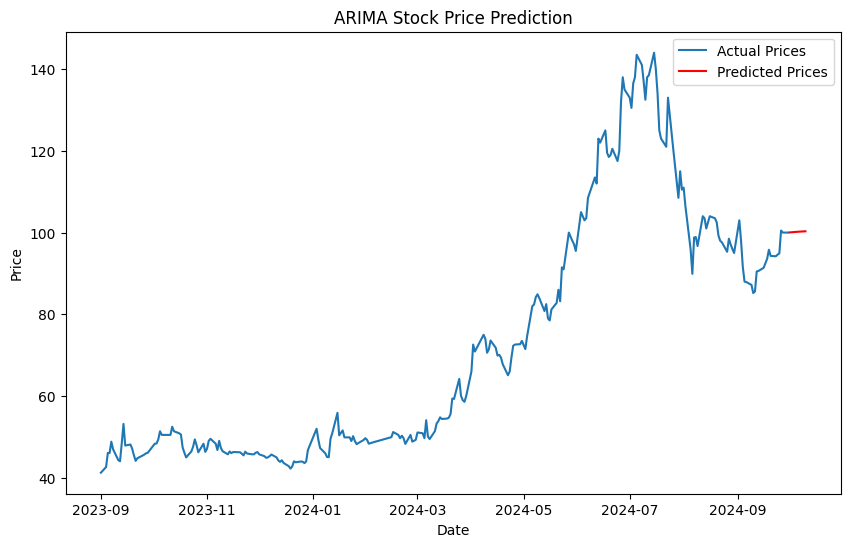

Predicted Prices for the next 10 days:
263    100.039126
264    100.076414
265    100.111949
266    100.145814
267    100.178088
268    100.208846
269    100.238158
270    100.266093
271    100.292715
272    100.318086
Name: predicted_mean, dtype: float64


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import adfuller

# 1. 載入資料
data = stock_data.copy()

# 2. 設置日期為索引，並只使用收盤價
data['日期'] = pd.to_datetime(data['日期'])
data.set_index('日期', inplace=True)
close_prices = data['收盤價']

# 3. 檢查數據的平穩性 (ADF test)
result = adfuller(close_prices)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# 4. 如果p-value > 0.05，資料非平穩，進行差分
# 差分處理 (ex: 一階差分)
close_prices_diff = close_prices.diff().dropna()

# 5. 建立ARIMA模型 (p,d,q可以用自動化工具或手動選擇)
model = ARIMA(close_prices, order=(1,1,1))  # 使用原始資料
model_fit = model.fit()

# 6. 進行預測
forecast = model_fit.forecast(steps=10)  # 預測未來10天

# 7. 可視化結果
plt.figure(figsize=(10, 6))
plt.plot(close_prices, label='Actual Prices')
plt.plot(pd.date_range(start=close_prices.index[-1] + pd.Timedelta(days=1), periods=10), forecast, label='Predicted Prices', color='red')
plt.title('ARIMA Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 輸出預測數列
print('Predicted Prices for the next 10 days:')
print(forecast)


#### 設計量化交易策略並進行回測

In [15]:
!pip install backtrader

In [16]:
# 檢查資料是否有 NaN 或 Inf
print(data.isna().sum())  # 檢查每列中的NaN數量
print(data.isin([float('inf'), float('-inf')]).sum())  # 檢查Inf值

# 處理 NaN 和 Inf
data = data.replace([float('inf'), float('-inf')], None)  # 將 Inf 替換為 None
data = data.dropna()  # 刪除含有 NaN 的行


成交股數    0
成交金額    0
開盤價     0
最高價     0
最低價     0
收盤價     0
漲跌價差    0
成交筆數    0
dtype: int64
成交股數    0
成交金額    0
開盤價     0
最高價     0
最低價     0
收盤價     0
漲跌價差    0
成交筆數    0
dtype: int64


In [17]:
data

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
日期,,,,,,,,
2023-09-01,"3,868,792","160,002,813",41.05,42.15,40.70,41.25,-0.05,"2,155"
2023-09-04,"3,830,653","161,436,535",41.50,42.90,41.05,42.65,+1.40,"2,311"
2023-09-05,"17,914,987","808,543,980",43.20,46.65,43.20,46.10,+3.45,"10,074"
2023-09-06,"7,963,726","367,461,917",46.00,46.95,45.60,46.05,-0.05,"4,466"
2023-09-07,"39,925,836","1,936,272,799",48.10,49.70,45.70,48.85,+2.80,"20,963"
...,...,...,...,...,...,...,...,...
2024-09-24,"8,628,849","821,923,069",94.20,97.30,93.30,94.60,+0.40,"7,155"
2024-09-25,"6,529,733","622,251,538",95.60,96.30,94.60,94.90,+0.30,"4,833"
2024-09-26,"29,060,361","2,930,693,598",95.80,103.50,95.10,100.50,+5.60,"18,478"


In [18]:
data = stock_data.copy()

# 2. 將日期設置為索引並轉換為日期格式
data['日期'] = pd.to_datetime(data['日期'])
data.set_index('日期', inplace=True)

# 3. 處理數據中的 "漲跌價差" 欄位
data.drop('漲跌價差', axis=1, inplace=True)

# 成交股數、成交金額、成交筆數轉成數字
data['成交股數'] = data['成交股數'].str.replace(',', '').astype(float)
data['成交金額'] = data['成交金額'].str.replace(',', '').astype(float)
data['成交筆數'] = data['成交筆數'].str.replace(',', '').astype(float)

# 4. 檢查價格欄位並確保所有相關欄位為數字類型
price_columns = ['開盤價', '最高價', '最低價', '收盤價']
data[price_columns] = data[price_columns].apply(pd.to_numeric, errors='coerce')

data.head()

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,成交筆數
日期,,,,,,,
2023-09-01,3868792.0,1.600028e+08,41.05,42.15,40.70,41.25,2155.0
2023-09-04,3830653.0,1.614365e+08,41.50,42.90,41.05,42.65,2311.0
2023-09-05,17914987.0,8.085440e+08,43.20,46.65,43.20,46.10,10074.0
2023-09-06,7963726.0,3.674619e+08,46.00,46.95,45.60,46.05,4466.0
2023-09-07,39925836.0,1.936273e+09,48.10,49.70,45.70,48.85,20963.0


In [19]:
import backtrader as bt
import pandas as pd

# 假設你的數據框是 stock_data
data = stock_data.copy()

# 將日期設置為索引並轉換為日期格式
data['日期'] = pd.to_datetime(data['日期'])
data.set_index('日期', inplace=True)

# 處理數據中的 "漲跌價差" 欄位 drop
data.drop('漲跌價差', axis=1, inplace=True)

# 成交股數 成交金額 成交筆數 也轉成數字
data['成交股數'] = data['成交股數'].str.replace(',', '').astype(int)
data['成交金額'] = data['成交金額'].str.replace(',', '').astype(float)
data['成交筆數'] = data['成交筆數'].str.replace(',', '').astype(int)

# 確保價格欄位為數字類型
price_columns = ['開盤價', '最高價', '最低價', '收盤價']
data[price_columns] = data[price_columns].apply(pd.to_numeric, errors='coerce')

# 檢查是否有 NaN 或 Inf，並清理這些數據
data.replace([float('inf'), float('-inf')], None, inplace=True)
data.dropna(inplace=True)

# 定義使用EMA的策略
class EmaCross(bt.Strategy):
    params = (
        ('short_period', 10),
        ('long_period', 30),
    )

    def __init__(self):
        self.short_ema = bt.indicators.ExponentialMovingAverage(self.data.close, period=self.params.short_period)
        self.long_ema = bt.indicators.ExponentialMovingAverage(self.data.close, period=self.params.long_period)
        self.buy_price = None
        self.sell_price = None
        self.trade_profit = []

    def next(self):
        if not self.position:
            if self.short_ema[0] > self.long_ema[0]:  # Buy signal
                self.buy()
                self.buy_price = self.data.close[0]
                print(f"Buying at {self.buy_price}")

        elif self.short_ema[0] < self.long_ema[0]:  # Sell signal
            self.sell()
            self.sell_price = self.data.close[0]
            profit = self.sell_price - self.buy_price
            self.trade_profit.append(profit)
            print(f"Selling at {self.sell_price}, Profit: {profit}")

    def stop(self):
        total_profit = sum(self.trade_profit)
        print(f"Total Trades: {len(self.trade_profit)}, Total Profit: {total_profit}")
        print(f"Final Portfolio Value: {self.broker.getvalue()}")


# 設定回測環境
cerebro = bt.Cerebro()

# 讀取資料到backtrader的格式
data_feed = bt.feeds.PandasData(
    dataname=data,
    datetime=None,
    open='開盤價',
    high='最高價',
    low='最低價',
    close='收盤價',
    volume='成交股數',
    openinterest=-1
)
cerebro.adddata(data_feed)

# 添加策略
cerebro.addstrategy(EmaCross)

# 設定初始資金（可選）
cerebro.broker.setcash(10000.0)

# 執行回測
cerebro.run(runonce=False, preload=True)


Buying at 50.6
Selling at 45.75, Profit: -4.850000000000001
Buying at 51.0
Selling at 115.0, Profit: 64.0
Total Trades: 2, Total Profit: 59.15
Final Portfolio Value: 10058.550000000001
